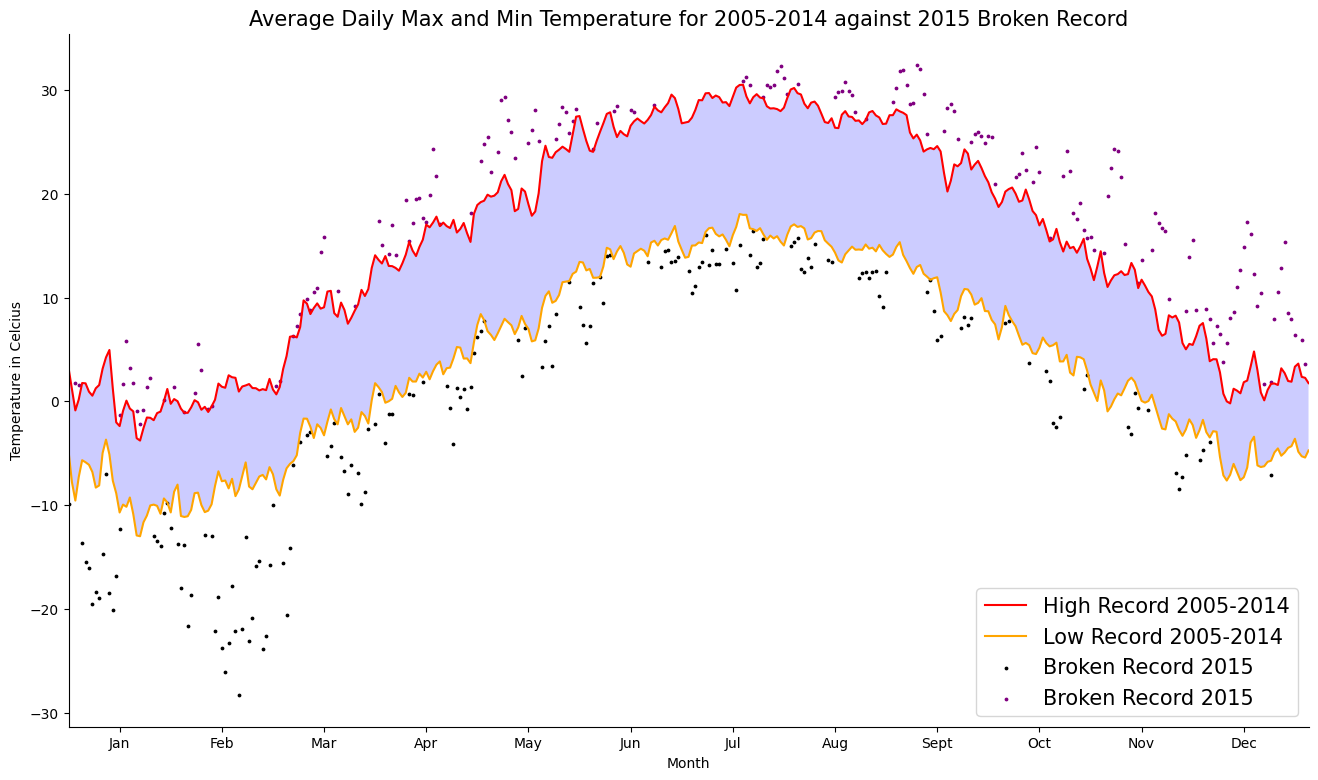

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

df = pd.read_csv('./data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df = df.sort_values(['ID', 'Date'])

# split the year, MM/DD 
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['Month-Day'] = df['Date'].apply(lambda x: x[5:])

# convert to celsius (/10), and get rid of 02/29
df['Data_Value']=df['Data_Value'].apply(lambda x: x/10.)
df = df[df['Month-Day'] != '02-29']

# aight, now we get different dfs for MIN and MAX
df_min = df[(df['Element'] == 'TMIN')]
df_max = df[(df['Element'] == 'TMAX')]

# let's also get rid of 2015 so we can get the years we average across
df_temp_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')]
df_temp_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')]

# now, get 2015 data
df_temp_min_2015 = df_min[df_min['Year']=='2015']
df_temp_max_2015 = df_max[df_max['Year']=='2015']

# group the data by MM/DD while averaging Data_Value for all stations 2005-2014
mean_temp_min = df_temp_min.groupby('Month-Day')['Data_Value'].agg([('temp_min_mean', np.mean)])
mean_temp_max = df_temp_max.groupby('Month-Day')['Data_Value'].agg([('temp_max_mean', np.mean)])


# group the data by MM/DD while averaging Data_Value for all stations 2015
mean_temp_min_2015 = df_temp_min_2015.groupby('Month-Day')['Data_Value'].agg([('temp_min_mean', np.mean)])
mean_temp_max_2015 = df_temp_max_2015.groupby('Month-Day')['Data_Value'].agg([('temp_max_mean', np.mean)])

# now, find the max_record and min_record for 2015
min_record = mean_temp_min_2015.where(mean_temp_min_2015['temp_min_mean']<mean_temp_min['temp_min_mean'])
max_record = mean_temp_max_2015.where(mean_temp_max_2015['temp_max_mean']>mean_temp_max['temp_max_mean'])

# to plot them nicely, we reset the index to adjust the ticks and show them in months
mean_temp_min = mean_temp_min.reset_index()
mean_temp_max = mean_temp_max.reset_index()

mean_temp_min_2015 = mean_temp_min_2015.reset_index()
mean_temp_max_2015 = mean_temp_max_2015.reset_index()

####################### plotting #######################

plt.figure(figsize=(16,9))

# plot both record low and high average 2004-2014
plt.plot(mean_temp_max['temp_max_mean'], color='red', label='High Record 2005-2014')
plt.plot(mean_temp_min['temp_min_mean'], color='orange', label='Low Record 2005-2014')
plt.gca().fill_between(range(len(mean_temp_min)), 
                       mean_temp_min['temp_min_mean'], mean_temp_max['temp_max_mean'], 
                       facecolor='blue', 
                       alpha=0.2)

# scatter plots for the broken records of 2015
plt.scatter(min_record.index, min_record['temp_min_mean'],color='black',
            s=3, label='Broken Record 2015')
plt.scatter(max_record.index, max_record['temp_max_mean'],color='purple',
            s=3, label='Broken Record 2015')

#ticks to months
daymonth = np.arange(0,350,30)
halfmonth = [i+15 for i in daymonth]
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=halfmonth, labels=month)

# aesthetics: get rid of useless spines and increase the overall font
plt.gca().spines[['top','right']].set_visible(False)
mpl.rcParams['font.size'] = 15

# labels and title
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.title('Average Daily Max and Min Temperature for 2005-2014 against 2015 Broken Record', fontsize=15)

# get rid of unnessecary white space on left and right side of the graph
plt.xlim(min_record.index[0],min_record.index[-1])

# put the legend in lower right to avoid covering the graph
plt.legend(loc='lower right');

plt.savefig('weather_plot_broken_2015.pdf')
